In [1]:
###Web scrapping###

import requests
import pandas as pd

In [2]:
url = "https://www.worldometers.info/coronavirus/#countries"

In [3]:
html = requests.get(url).content

In [4]:
df_list = pd.read_html(html)

In [5]:
df = df_list[-1]

In [6]:
df.to_csv('covid.csv', index=False)

# EDA

In [7]:
df_covid = pd.read_csv('covid.csv')

In [8]:
import matplotlib.pyplot as plt

In [9]:
df_covid.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,1stcase
0,China,81340,+55,3292.0,+5,74588.0,3460,1034.0,57.0,2.0,Jan 10
1,USA,104126,"+18,691",1696.0,+401,2522.0,99908,2463.0,315.0,5.0,Jan 20
2,Italy,86498,"+5,909",9134.0,+919,10950.0,66414,3732.0,1431.0,151.0,Jan 29
3,Spain,65719,"+7,933",5138.0,+773,9357.0,51224,4165.0,1406.0,110.0,Jan 30
4,Germany,50871,"+6,933",351.0,+84,6658.0,43862,1581.0,607.0,4.0,Jan 26


In [10]:
df_covid.shape

(202, 11)

In [11]:
df_covid.rename(columns = {'Country,Other':'Country',
                          'Serious,Critical':'Critical'
                          },inplace = True)

In [12]:
df_covid.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop,1stcase
0,China,81340,+55,3292.0,+5,74588.0,3460,1034.0,57.0,2.0,Jan 10
1,USA,104126,"+18,691",1696.0,+401,2522.0,99908,2463.0,315.0,5.0,Jan 20
2,Italy,86498,"+5,909",9134.0,+919,10950.0,66414,3732.0,1431.0,151.0,Jan 29
3,Spain,65719,"+7,933",5138.0,+773,9357.0,51224,4165.0,1406.0,110.0,Jan 30
4,Germany,50871,"+6,933",351.0,+84,6658.0,43862,1581.0,607.0,4.0,Jan 26


Total number of countries 

In [13]:
df_covid.Country.count()

202

Total cases all over the world

In [14]:
df_covid.TotalCases.sum()

1192624

Total recover cases all over the world

In [15]:
df_covid.TotalRecovered.sum()

265352.0

Total deaths all over world

In [16]:
df_covid.TotalDeaths.sum()

54682.0

# COUNTRY VS TOTALDEATH

In [17]:
death = df_covid.sort_values(by = 'TotalDeaths', ascending = False).head(30).iloc[1:]

In [18]:
death.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop,1stcase
2,Italy,86498,"+5,909",9134.0,+919,10950.0,66414,3732.0,1431.0,151.0,Jan 29
3,Spain,65719,"+7,933",5138.0,+773,9357.0,51224,4165.0,1406.0,110.0,Jan 30
0,China,81340,+55,3292.0,+5,74588.0,3460,1034.0,57.0,2.0,Jan 10
6,Iran,32332,"+2,926",2378.0,+144,11133.0,18821,2893.0,385.0,28.0,Feb 18
5,France,32964,"+3,809",1995.0,+299,5700.0,25269,3787.0,505.0,31.0,Jan 23


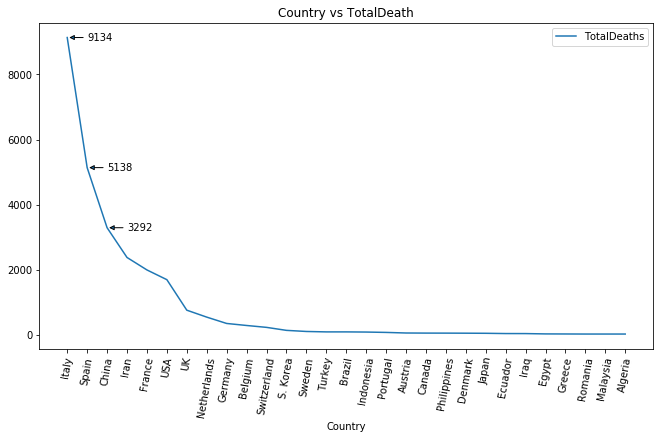

In [20]:
plt.figure(figsize=(11,6))
plt.plot(death['Country'],death['TotalDeaths'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.title('Country vs TotalDeath')
plt.annotate(9134, 
             xy=('Italy', 9134),
             xytext = ('Spain',9134),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(5138, 
             xy=('Spain', 5138),
             xytext = ('China', 5138),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(3292, 
             xy=('China', 3292),
             xytext = ('Iran', 3292),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()

# COUNTRY VS TOTALCASES

In [21]:
case = df_covid.sort_values(by = 'TotalCases', ascending = False).head(30).iloc[1:]

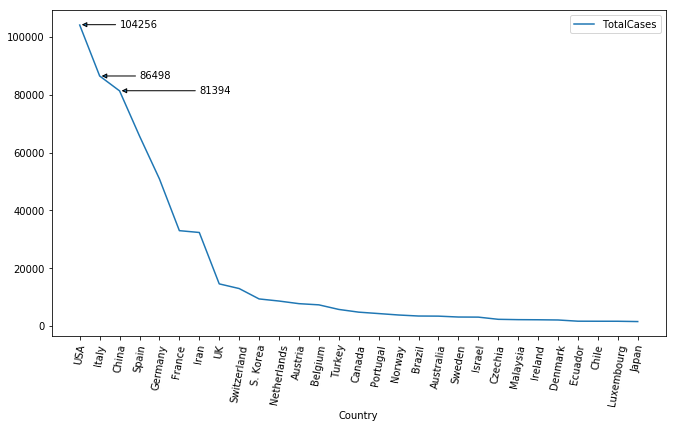

In [22]:
plt.figure(figsize=(11,6))
plt.plot(case['Country'],case['TotalCases'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.annotate(86498, 
             xy=('Italy', 86498),
             xytext = ('Spain',86498),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(104256, 
             xy=('USA', 104256),
             xytext = ('China', 104256),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(81394, 
             xy=('China', 81394),
             xytext = ('Iran', 81394),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()

# COUNTRY VS TOTALRECOVERED

In [24]:
recover = df_covid.sort_values(by = 'TotalRecovered', ascending = False).head(30).iloc[1:]

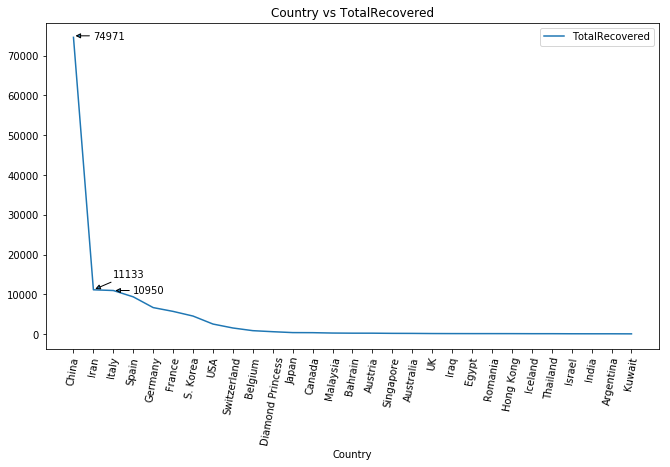

In [29]:
plt.figure(figsize=(11,6))
plt.plot(recover['Country'],recover['TotalRecovered'])
degree = 80
plt.xticks(rotation=degree)
plt.legend()
plt.xlabel('Country')
plt.title('Country vs TotalRecovered')
plt.annotate(11133, 
             xy=('Iran', 11133),
             xytext = ('Italy',15000),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(10950, 
             xy=('Italy', 10950),
             xytext = ('Spain', 10950),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.annotate(74971, 
             xy=('China', 74971),
             xytext = ('Iran', 74971),
              arrowprops={'arrowstyle': '-|>'},
             va = 'center'
             ) 
plt.show()